# **Import Libraries and modules**

### Install Keras module for python and import it to run basic keras functions for model building.

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


### Import Numpy library which is usually used to store data. Also import other support libraries in keras for model building and predefined dataset loading.

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


### Matplotlib is a visualization tool of python which can be used to plot graphs and display images. Here we first print the total number of images used for training. Then import matplotlib library and show the first training image.

(60000, 28, 28)


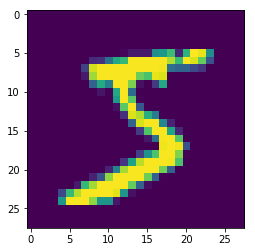

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

### As the dataset contains single channel images, we reshape array to correct the input channel dimension.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

### Normalize values between 0 to 1

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

### Show labels of last 10 train data

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

### Convert 1-dimensional class arrays to 10-dimensional class matrices

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

### Show the matrix converted labels of last 10 images

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Model Building Code

In [770]:
from keras.layers import Activation
model = Sequential()
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))#26x26

model.add(Convolution2D(16, 3, 3, activation='relu'))#24x24
model.add(Convolution2D(16, 3, 3, activation='relu'))#22x22

model.add(MaxPooling2D(pool_size=(2,2)))#11x11
model.add(Convolution2D(8, 1))#11x11

model.add(Convolution2D(8, 3, 3, activation='relu'))#9x9
model.add(Convolution2D(16, 3, 3, activation='relu'))#7x7
model.add(Convolution2D(16, 3, 3, activation='relu'))#5x5
model.add(Convolution2D(16, 3, 3, activation='relu'))#3x3
model.add(Convolution2D(32, 3, 3, activation='relu'))#1x1

model.add(Convolution2D(10, 1))
model.add(Flatten())

model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Co

### Model Summary with architecture details

In [771]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2545 (Conv2D)         (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_2546 (Conv2D)         (None, 24, 24, 16)        2320      
_________________________________________________________________
conv2d_2547 (Conv2D)         (None, 22, 22, 16)        2320      
_________________________________________________________________
max_pooling2d_491 (MaxPoolin (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_2548 (Conv2D)         (None, 11, 11, 8)         136       
_________________________________________________________________
conv2d_2549 (Conv2D)         (None, 9, 9, 8)           584       
_________________________________________________________________
conv2d_2550 (Conv2D)         (None, 7, 7, 16)          1168      
__________

### Configuring the remaining hyperparameters for model like loss function, optimizer and evalution metric.

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

###Begin the model training by assigning batch_size(No. of images processed simultaneously) and epochs(A single cycle through all the training data )

In [773]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 32s 540us/step - loss: 0.2630 - acc: 0.9187
Epoch 2/10
60000/60000 [==============================] - 21s 357us/step - loss: 0.0953 - acc: 0.9703
Epoch 3/10
60000/60000 [==============================] - 21s 357us/step - loss: 0.0692 - acc: 0.9784
Epoch 4/10
60000/60000 [==============================] - 21s 357us/step - loss: 0.0574 - acc: 0.9818
Epoch 5/10
60000/60000 [==============================] - 22s 358us/step - loss: 0.0466 - acc: 0.9854
Epoch 6/10
60000/60000 [==============================] - 21s 355us/step - loss: 0.0410 - acc: 0.9870
Epoch 7/10
60000/60000 [==============================] - 22s 360us/step - loss: 0.0358 - acc: 0.9883
Epoch 8/10
60000/60000 [==============================] - 21s 356us/step - loss: 0.0332 - acc: 0.9896
Epoch 9/10
60000/60000 [==============================] - 21s 357us/step - loss: 0.0317 - acc: 0.9900
Epoch 10/10
60000/60000 [==============================] - 21s 356us/step - loss: 

### Calculate the validation score

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

### Show the *validation* score

In [775]:
print(score)

[0.03775609024292644, 0.9895]


### Predict the label for the test images

In [0]:
y_pred = model.predict(X_test)

### Compare the prediction to the ground truth

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[5.4103373e-17 9.9250139e-17 7.0478498e-11 8.1431937e-09 1.5371267e-18
  3.4065495e-16 1.3831200e-28 1.0000000e+00 1.1632747e-12 3.7444594e-13]
 [1.5590016e-12 1.0376795e-12 1.0000000e+00 1.3377038e-15 2.8307490e-25
  6.9740182e-16 5.9095062e-10 2.2700881e-26 6.3319745e-14 4.5974378e-19]
 [1.2110499e-06 9.9998736e-01 6.1550900e-06 1.1299691e-09 3.5312692e-06
  4.4639861e-09 1.3871329e-07 9.0033097e-08 1.3943900e-06 1.8434924e-09]
 [9.9999988e-01 1.1971662e-17 1.3369107e-07 2.6846032e-16 2.1086121e-20
  2.3474397e-14 2.1216487e-11 1.4248144e-12 2.4958965e-11 1.6649597e-13]
 [1.7903410e-13 1.2011289e-15 2.2280582e-11 5.9111292e-14 1.0000000e+00
  3.4044075e-15 1.7284326e-14 1.6666581e-11 5.4078575e-11 5.4786269e-09]
 [3.7510932e-09 9.9998844e-01 3.8921334e-07 9.0481378e-10 1.7510017e-06
  4.8054938e-10 1.4774745e-09 1.3920518e-06 8.0737564e-06 3.3634670e-08]
 [1.8485475e-21 5.2460904e-14 7.2022327e-10 3.4573816e-11 9.9993944e-01
  4.1310418e-08 1.9495927e-18 9.5341868e-10 5.8626250e-05 

### Saving layer names in a dict datatype so that we can later use it for visualization.

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

### Code to Visualise the kernel extracted features of a particular layer and input images.

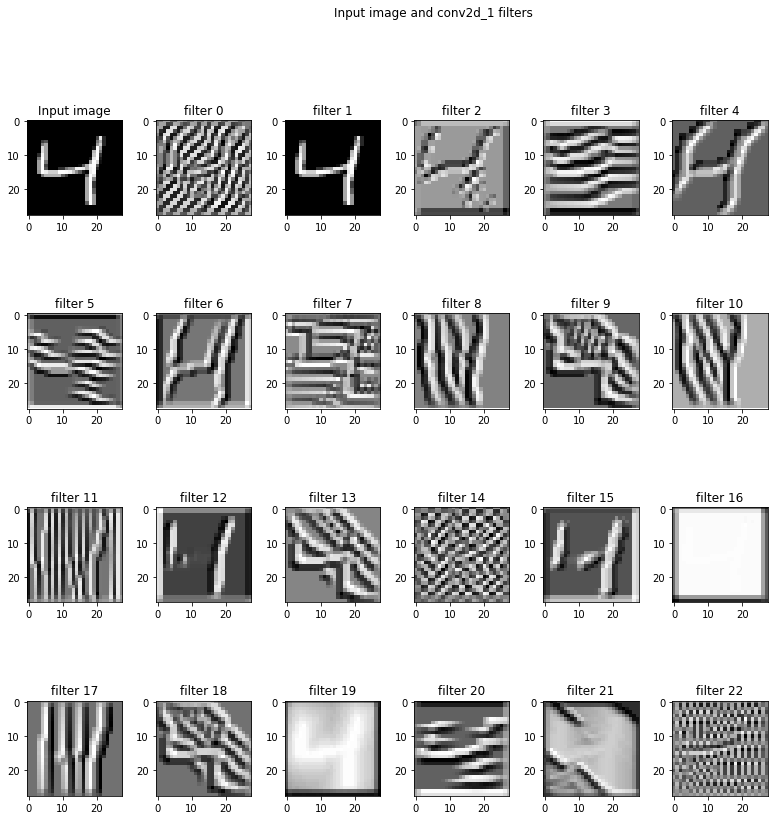

In [20]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()